In [87]:
import tabulate as tb
import numpy as np
import matplotlib.pyplot as plt

T_SIST=350.2099                   #TEMPERATURA DEL SISTEMA QUE SE BUSCA EN DIAGRAMA Pxy (K)
P_SIST=1                          #PRESIÓN DEL SISTEMA QUE SE BUSCA EN DIAGRAMA Txy (atm)
R=1.987207                        #CONSTANTE DE LOS GASES IDEALES (cal/(mol*K))

COMP=['ISO-OCTANO', 'ETANOL']  #COMPONENTES DE LA MEZCLA (1 Y 2)

#INGRESO DE LOS PAREMETROS DEL VOLUMEN MOLAR EN FUNCIÓN DE LA TEMPERATURA [COMP.1,COMP.2]
A_VM=[143.96651,23.01241]
B_VM=[-0.04972,0.17621]
C_VM=[0.00042,-0.00019]

#INGRESO DE LOS PARAMETROS DE WILSON ENTRE COMPONENTE 1 Y COMPONENTE 2 (cal/gmol)
lambda_12_11=384.90
lambda_21_22=2449.12

#CONSTANTES DE LAS ECUACIONES DE ANTOINE
CA_1=[105.5669,123.9120]
CA_2=[-7434.5352,-8754.0896]
CA_3=[0,0]
CA_4=[0.0162,0.0202]
CA_5=[0,0]
CA_6=[-15.4819,-18.1]

print("*** DATOS INGRESADOS AL PROGRAMA ***")

*** DATOS INGRESADOS AL PROGRAMA ***


RESUMEN DE RESULTADOS DE COEFICIENTES DE ACTIVIDAD Y COMPOSICIÓN DE LÍQUIDO Y VAPOR
A TEMPERATURA CONSTANTE
-------------------------------------------------------------------------------------

╒══════════════╤══════════╤══════════════╤══════════════╤════════════╤════════════╤═══════════════╤═════════════╤══════════════╤══════════╕
│      X1      │    X2    │  COEF. ACT.  │  COEF. ACT.  │  P. VAP.   │  P. VAP.   │  P. V. SIST.  │  TEMP. DEL  │      Y1      │    Y2    │
│  ISO-OCTANO  │  ETANOL  │     (γ1)     │     (γ2)     │  (P1,atm)  │  (P2,atm)  │   (PT,atm)    │  SIST. (K)  │  ISO-OCTANO  │  ETANOL  │
╞══════════════╪══════════╪══════════════╪══════════════╪════════════╪════════════╪═══════════════╪═════════════╪══════════════╪══════════╡
│    0.0000    │  1.0000  │   12.5736    │    1.0000    │   0.0000   │   0.9513   │    0.9513     │  350.2099   │    0.0000    │  1.0000  │
├──────────────┼──────────┼──────────────┼──────────────┼────────────┼────────────┼───────────────┼──────

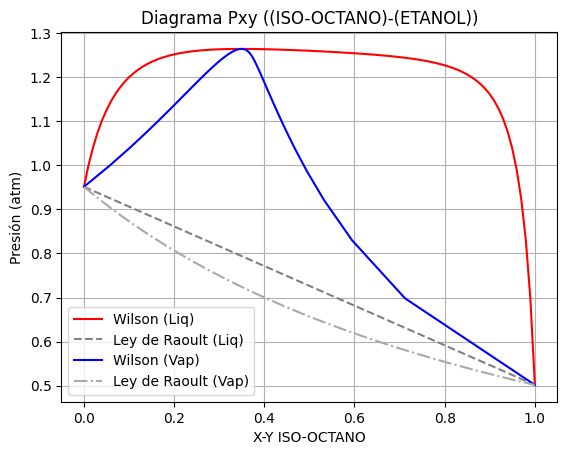

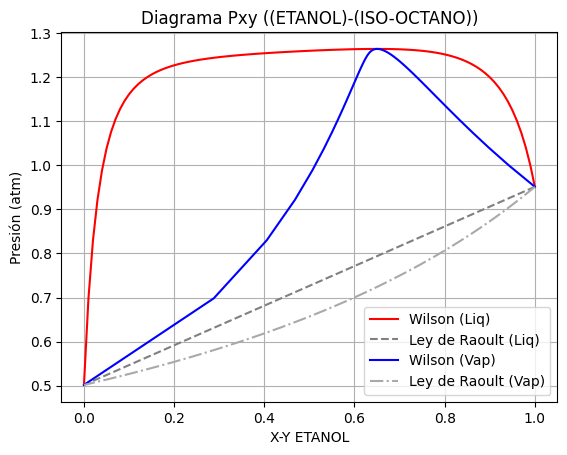

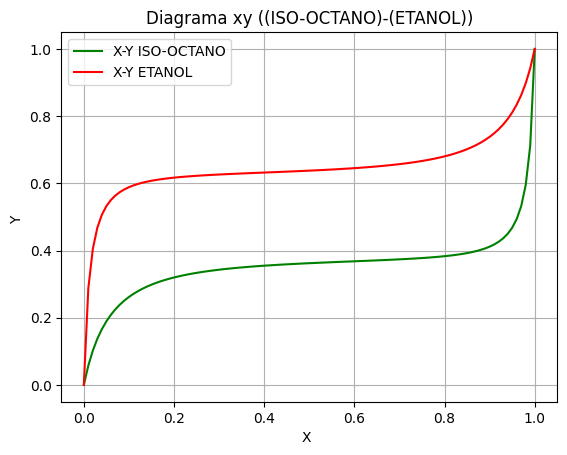

In [88]:
VMOL_SP=[]
for i in range(len(A_VM)):
    VMOL_SP.append(A_VM[i]+(B_VM[i]*T_SIST)+(C_VM[i]*(T_SIST**2)))

LAMBDA_12=(VMOL_SP[1]/VMOL_SP[0])*(np.exp(-lambda_12_11/(R*T_SIST)))
LAMBDA_21=(VMOL_SP[0]/VMOL_SP[1])*(np.exp(-lambda_21_22/(R*T_SIST)))

PVAP_P=[]
for i in range(len(CA_1)):
    PVAP_P.append(np.exp(CA_1[i]+(CA_2[i]/(CA_3[i]+T_SIST))+(CA_4[i]*T_SIST)+(CA_5[i]*(T_SIST**2))+(CA_6[i]*(np.log(T_SIST)))))

X1=[]
X2=[]
n=101
for i in range(n):
    X1.append(0.01*i)
    X2.append(1-X1[i])

GAMMA1=[]
GAMMA2=[]
P1=[]
P2=[]
PT=[]
Y1=[]
Y2=[]
PR=[]
YR1=[]
YR2=[]
for i in range(n):
    GAMMA1.append(np.exp((-(np.log(X1[i]+(LAMBDA_12*X2[i]))))+(X2[i]*((LAMBDA_12/(X1[i]+(LAMBDA_12*X2[i])))-(LAMBDA_21/((LAMBDA_21*X1[i])+X2[i]))))))
    GAMMA2.append(np.exp((-(np.log(X2[i]+(LAMBDA_21*X1[i]))))-(X1[i]*((LAMBDA_12/(X1[i]+(LAMBDA_12*X2[i])))-(LAMBDA_21/((LAMBDA_21*X1[i])+X2[i]))))))
    P1.append(X1[i]*GAMMA1[i]*PVAP_P[0])
    P2.append(X2[i]*GAMMA2[i]*PVAP_P[1])
    PT.append(P1[i]+P2[i])
    Y1.append((X1[i]*GAMMA1[i]*PVAP_P[0])/PT[i])
    Y2.append((X2[i]*GAMMA2[i]*PVAP_P[1])/PT[i])
    PR.append((X1[i]*PVAP_P[0])+(X2[i]*PVAP_P[1]))
    YR1.append((X1[i]*PVAP_P[0])/PR[i])
    YR2.append((X2[i]*PVAP_P[1])/PR[i])
    

#RESUMEN DE RESULTADOS DE LO OBTENIDO EN ESTE PROGRAMA
print("RESUMEN DE RESULTADOS DE COEFICIENTES DE ACTIVIDAD Y COMPOSICIÓN DE LÍQUIDO Y VAPOR\nA TEMPERATURA CONSTANTE")
print("-------------------------------------------------------------------------------------\n")

ENC_RVD = [f"X1\n{COMP[0].upper()}", f"X2\n{COMP[1].upper()}","COEF. ACT.\n(γ1)","COEF. ACT.\n(γ2)", "P. VAP.\n(P1,atm)", "P. VAP.\n(P2,atm)", "P. V. SIST.\n(PT,atm)", "TEMP. DEL\nSIST. (K)", f"Y1\n{COMP[0].upper()}", f"Y2\n{COMP[1].upper()}"]
FIL_RVD = []
for i in range(n):
    FIL_RVD.append([X1[i], X2[i], GAMMA1[i], GAMMA2[i], P1[i], P2[i], PT[i], T_SIST, Y1[i], Y2[i]])
print(tb.tabulate(FIL_RVD, headers=ENC_RVD, tablefmt="fancy_grid", floatfmt=".4f", stralign="center", numalign="center"))

print(f"\n\nGRÁFICOS CORRESPONDIENTE A TEMPERATURA: {T} K")
print("------------------------------------------------")
plt.plot(X1,PT, color='red', linestyle='-', label='Wilson (Liq)')
plt.plot(X1,PR, color='gray', linestyle='--', label='Ley de Raoult (Liq)')
plt.plot(Y1,PT, color='blue', linestyle='-', label='Wilson (Vap)')
plt.plot(YR1,PR, color='darkgrey', linestyle='-.', label='Ley de Raoult (Vap)')
plt.xlabel(f'X-Y {COMP[0].upper()}')
plt.ylabel('Presión (atm)')
plt.title(f'Diagrama Pxy (({COMP[0].upper()})-({COMP[1].upper()}))')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X2,PT, color='red', linestyle='-', label='Wilson (Liq)')
plt.plot(X2,PR, color='gray', linestyle='--', label='Ley de Raoult (Liq)')
plt.plot(Y2,PT, color='blue', linestyle='-', label='Wilson (Vap)')
plt.plot(YR2,PR, color='darkgrey', linestyle='-.', label='Ley de Raoult (Vap)')
plt.xlabel(f'X-Y {COMP[1].upper()}')
plt.ylabel('Presión (atm)')
plt.title(f'Diagrama Pxy (({COMP[1].upper()})-({COMP[0].upper()}))')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X1,Y1, color='green', label=f'X-Y {COMP[0].upper()}')
plt.plot(X2,Y2, color='red', label=f'X-Y {COMP[1].upper()}')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.title(f'Diagrama xy (({COMP[0].upper()})-({COMP[1].upper()}))')
plt.legend()
plt.grid(True)
plt.show()


RESUMEN DE RESULTADOS DE COEFICIENTES DE ACTIVIDAD Y COMPOSICIÓN DE LÍQUIDO Y VAPOR
A PRESIÓN CONSTANTE
-------------------------------------------------------------------------------------

╒══════════════╤══════════╤══════════════╤══════════════╤════════════╤════════════╤═══════════════╤═════════════╤══════════════╤══════════╕
│      X1      │    X2    │  COEF. ACT.  │  COEF. ACT.  │  P. VAP.   │  P. VAP.   │  P. V. SIST.  │  TEMP. DEL  │      Y1      │    Y2    │
│  ISO-OCTANO  │  ETANOL  │     (γ1)     │     (γ2)     │  (P1,atm)  │  (P2,atm)  │   (PT,atm)    │  SIST. (K)  │  ISO-OCTANO  │  ETANOL  │
╞══════════════╪══════════╪══════════════╪══════════════╪════════════╪════════════╪═══════════════╪═════════════╪══════════════╪══════════╡
│    0.0000    │  1.0000  │   12.5449    │    1.0000    │   0.0000   │   1.0000   │    1.0000     │  351.4657   │    0.0000    │  1.0000  │
├──────────────┼──────────┼──────────────┼──────────────┼────────────┼────────────┼───────────────┼──────────

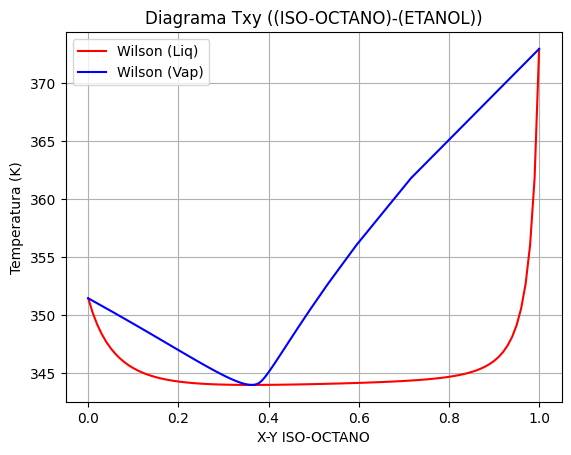

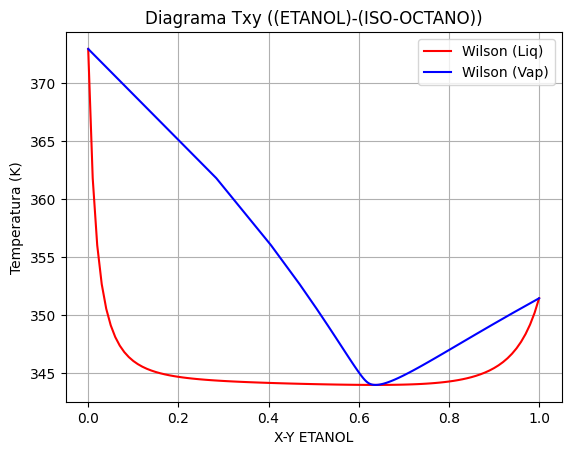

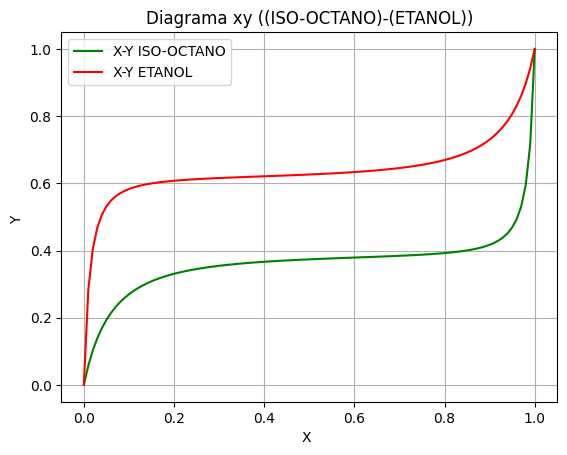

In [91]:
P_OBJ=P_SIST

TF_S=[]
X1_S=[]
X2_S=[]
GAMMA1_S=[]
GAMMA2_S=[]
P1_S=[]
P2_S=[]
PT_S=[]
Y1_S=[]
Y2_S=[]

X1=0
TOL=0.000001
while X1<=1.01:
    X2=1-X1
    T=273
    ERROR=1
    while abs(ERROR)>TOL:
        #CALCULAR VOLUMENES MOLAR EN FUNCION A LA T INICIAL Ó MODIFICADA
        VM1=(A_VM[0]+(B_VM[0]*T)+(C_VM[0]*(T**2)))
        VM2=(A_VM[1]+(B_VM[1]*T)+(C_VM[1]*(T**2)))
        #CALCULAR LAMBDA A LA T INICIAL
        LAMBDA_12=(VM2/VM1)*(np.exp(-lambda_12_11/(R*T)))
        LAMBDA_21=(VM1/VM2)*(np.exp(-lambda_21_22/(R*T)))
        #CALCULAR LOS COEFICIENTES DE ACTIVIDAD A LA T INICIAL Ó MODIFICADA
        GAMMA1=(np.exp((-(np.log(X1+(LAMBDA_12*X2))))+(X2*((LAMBDA_12/(X1+(LAMBDA_12*X2)))-(LAMBDA_21/((LAMBDA_21*X1)+X2))))))
        GAMMA2=(np.exp((-(np.log(X2+(LAMBDA_21*X1))))-(X1*((LAMBDA_12/(X1+(LAMBDA_12*X2)))-(LAMBDA_21/((LAMBDA_21*X1)+X2))))))
        #CALCULAR DE PRESION DE VAPOR PURA A LA T INICIAL Ó MODIFICADA
        PVAP_P1=(np.exp(CA_1[0]+(CA_2[0]/(CA_3[0]+T))+(CA_4[0]*T)+(CA_5[0]*(T**2))+(CA_6[0]*(np.log(T)))))
        PVAP_P2=(np.exp(CA_1[1]+(CA_2[1]/(CA_3[1]+T))+(CA_4[1]*T)+(CA_5[1]*(T**2))+(CA_6[1]*(np.log(T)))))
        #CALCULAR LAS PRESIONES PARCIALES INICIALES Ó MODIFICADAS
        P1=X1*GAMMA1*PVAP_P1
        P2=X2*GAMMA2*PVAP_P2
        #CALCULAR LA PRESIÓN TOTAL INICIAL Ó MODIFICADA
        PT=P1+P2
        #NUEVA TEMPERATURA PARA OBTENER LA NUEVA TEMPERATURA MODIFICADA
        T_N=T+0.1
        #CALCULAR VOLUMENES MOLAR EN FUNCION A LA T NUEVA
        VM1_N=(A_VM[0]+(B_VM[0]*T_N)+(C_VM[0]*(T_N**2)))
        VM2_N=(A_VM[1]+(B_VM[1]*T_N)+(C_VM[1]*(T_N**2)))
        #CALCULAR LAMBDA A LA T NUEVA
        LAMBDA_12_N=(VM2/VM1)*(np.exp(-lambda_12_11/(R*T_N)))
        LAMBDA_21_N=(VM1/VM2)*(np.exp(-lambda_21_22/(R*T_N)))
        #CALCULAR LOS COEFICIENTES DE ACTIVIDAD A LA T NUEVA
        GAMMA1_N=(np.exp((-(np.log(X1+(LAMBDA_12*X2))))+(X2*((LAMBDA_12/(X1+(LAMBDA_12*X2)))-(LAMBDA_21/((LAMBDA_21*X1)+X2))))))
        GAMMA2_N=(np.exp((-(np.log(X2+(LAMBDA_21*X1))))-(X1*((LAMBDA_12/(X1+(LAMBDA_12*X2)))-(LAMBDA_21/((LAMBDA_21*X1)+X2))))))
        #CALCULAR DE PRESION DE VAPOR PURA A LA T NUEVA
        PVAP_P1_N=(np.exp(CA_1[0]+(CA_2[0]/(CA_3[0]+T_N))+(CA_4[0]*T_N)+(CA_5[0]*(T_N**2))+(CA_6[0]*(np.log(T_N)))))
        PVAP_P2_N=(np.exp(CA_1[1]+(CA_2[1]/(CA_3[1]+T_N))+(CA_4[1]*T_N)+(CA_5[1]*(T_N**2))+(CA_6[1]*(np.log(T_N)))))
        #CALCULAR LAS PRESIONES PARCIALES NUEVAS
        P1_N=X1*GAMMA1_N*PVAP_P1_N
        P2_N=X2*GAMMA2_N*PVAP_P2_N
        #CALCULAR LA PRESIÓN TOTAL NUEVA
        PT_N=P1_N+P2_N
        #CARCULAR EL ERROR OBTENIDO A PARTIR DE LA TEMPERATURA INICIAL Y TEMPERATURA FINAL PARA OBTENER UNA TEMPERATURA MODIFICADA
        ERROR=np.log(PT/P_OBJ)
        E_N=np.log(PT_N/P_OBJ)
        T_MOD=(T*T_N*(E_N-ERROR))/(T_N*E_N-T*ERROR)
        T=T_MOD
    
    Y1=P1/PT
    Y2=P2/PT
    TF_S.append(T)
    X1_S.append(X1)
    X2_S.append(X2)
    GAMMA1_S.append(GAMMA1)
    GAMMA2_S.append(GAMMA2)
    P1_S.append(P1)
    P2_S.append(P2)
    PT_S.append(PT)
    Y1_S.append(Y1)
    Y2_S.append(Y2)
    X1=X1+0.01

print("RESUMEN DE RESULTADOS DE COEFICIENTES DE ACTIVIDAD Y COMPOSICIÓN DE LÍQUIDO Y VAPOR\nA PRESIÓN CONSTANTE")
print("-------------------------------------------------------------------------------------\n")
ENC_RVD = [f"X1\n{COMP[0].upper()}", f"X2\n{COMP[1].upper()}","COEF. ACT.\n(γ1)","COEF. ACT.\n(γ2)", "P. VAP.\n(P1,atm)", "P. VAP.\n(P2,atm)", "P. V. SIST.\n(PT,atm)", "TEMP. DEL\nSIST. (K)", f"Y1\n{COMP[0].upper()}", f"Y2\n{COMP[1].upper()}"]
FIL_RVD = []
for i in range(len(X1_S)):
    FIL_RVD.append([X1_S[i], X2_S[i], GAMMA1_S[i], GAMMA2_S[i], P1_S[i], P2_S[i], PT_S[i], TF_S[i], Y1_S[i], Y2_S[i]])
print(tb.tabulate(FIL_RVD, headers=ENC_RVD, tablefmt="fancy_grid", floatfmt=".4f", stralign="center", numalign="center"))

print(f"\n\nGRÁFICOS CORRESPONDIENTE A PRESIÓN: {P_OBJ} atm")
print("------------------------------------------------")
plt.plot(X1_S,TF_S, color='red', linestyle='-', label='Wilson (Liq)')
plt.plot(Y1_S,TF_S, color='blue', linestyle='-', label='Wilson (Vap)')
plt.xlabel(f'X-Y {COMP[0].upper()}')
plt.ylabel('Temperatura (K)')
plt.title(f'Diagrama Txy (({COMP[0].upper()})-({COMP[1].upper()}))')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X2_S,TF_S, color='red', linestyle='-', label='Wilson (Liq)')
plt.plot(Y2_S,TF_S, color='blue', linestyle='-', label='Wilson (Vap)')
plt.xlabel(f'X-Y {COMP[1].upper()}')
plt.ylabel('Temperatura (K)')
plt.title(f'Diagrama Txy (({COMP[1].upper()})-({COMP[0].upper()}))')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X1_S,Y1_S, color='green', label=f'X-Y {COMP[0].upper()}')
plt.plot(X2_S,Y2_S, color='red', label=f'X-Y {COMP[1].upper()}')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.title(f'Diagrama xy (({COMP[0].upper()})-({COMP[1].upper()}))')
plt.legend()
plt.grid(True)
plt.show()
